Преподаватель: Артур Сапрыкин, Наталья Баданина
Взять из прошлого домашнего задания ряд (в двух вариантах - стационарный и нет) и приблизить оба эти варианта моделями из класса MA. Оценить качество и прислать соображения почему была выбрана та или иная модель

Refining Details in Slack:
Артур Сапрыкин(opens in new tab)  1 day ago
@Alexey Konstantinov тут необходимо взять любой из предложенных ранее временных рядов, и описать его через любым подходящим методом класса MA.
То есть, один временной ряд придется описывать дважды. В первом случае, описывается "как есть", а во втором случае, необходимо сначала привести ряд к стационарному виду, а потом уже описать

Alexey Konstantinov(opens in new tab)  1 day ago
Что значит описать?
Артур Сапрыкин(opens in new tab)  1 day ago
@Alexey Konstantinov с использованием алгоритмов научиться предсказывать следующие значения

Alexey Konstantinov(opens in new tab)  1 day ago
@Артур Сапрыкин А на сколько вперед? (edited) 

Артур Сапрыкин(opens in new tab)  1 day ago
@Alexey Konstantinov Нет ограничений. Там особо далеко не получится классно предсказывать, но по форме графиков будет понятно - получилось или нет
Рекомендую из всего показанного на занятии арсенала алгоритмов выбрать тот, который сделает это лучше всех

Summery ToDo:
"Взять из прошлого домашнего задания ряд (в двух вариантах - стационарный и нет)". 1 Series
"В первом случае, описывается "как есть", а во втором случае, необходимо сначала привести ряд к стационарному виду, а потом уже описать (предсказывать следующие значения). А на сколько вперед? Там особо далеко не получится классно предсказывать (5 day ahead)
Оценить качество (RMSE) и прислать соображения почему была выбрана та или иная модель

In [2]:
from scipy.special import factorial
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from scipy.stats import boxcox
%matplotlib inline

In [3]:
# Скачайте материалы к занятию. 
# в двух вариантах - стационарный и нет
# This time series I would use for this work
airlines_passengers = pd.read_csv("../01/Series/international-airline-passengers.csv")['Count']

# прислать соображения почему была выбрана та или иная модель
# This time series contains seasonality and trend. It's most interesting for this work

In [4]:
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)
    
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    test_stationarity(y)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
    return

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


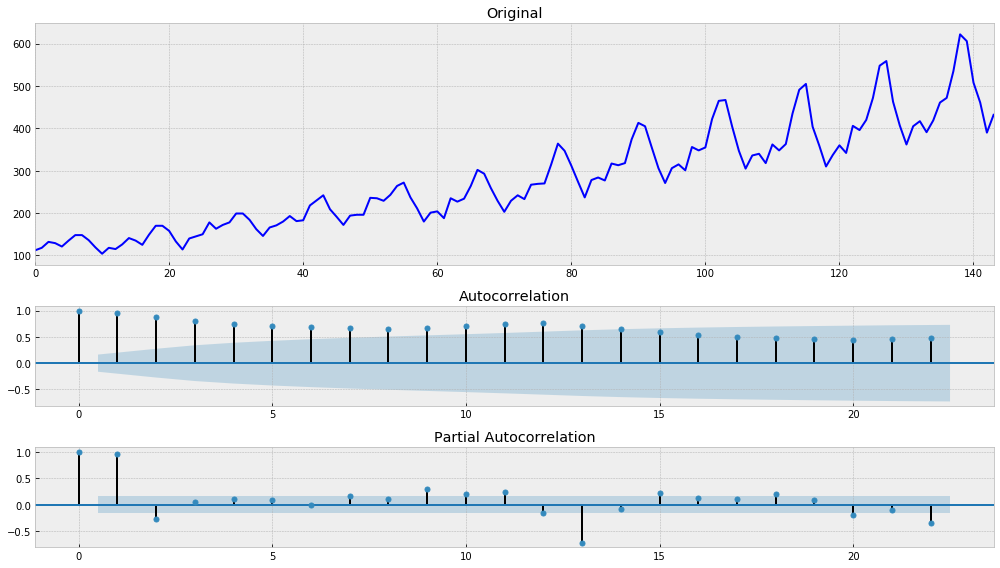

In [5]:
tsplot(airlines_passengers)
# this is not stationaruty

Results of Dickey-Fuller Test:
Test Statistic                  -4.549180
p-value                          0.000160
#Lags Used                      12.000000
Number of Observations Used    117.000000
Critical Value (1%)             -3.487517
Critical Value (5%)             -2.886578
Critical Value (10%)            -2.580124
dtype: float64


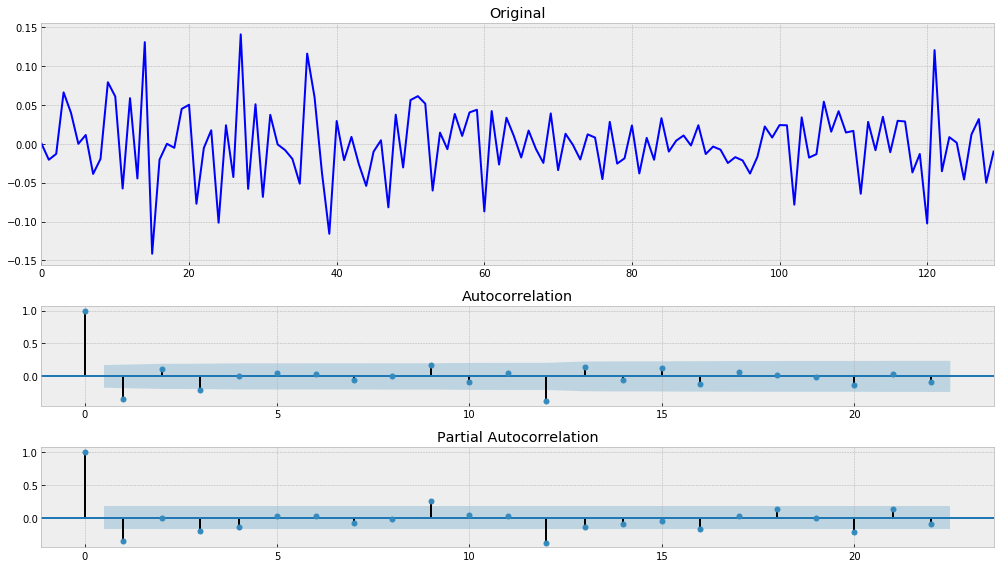

In [6]:
# # Remove variance via BoxCox
airlines_passengers_stat_0 = boxcox(airlines_passengers, 0)

# Remove trend
airlines_passengers_stat_1 = airlines_passengers_stat_0[1:] - airlines_passengers_stat_0[:-1]
airlines_passengers_stat_1 = airlines_passengers_stat_1[1:]

# remove seasonality
airlines_passengers_stat = airlines_passengers_stat_1[12:] - airlines_passengers_stat_1[:-12]
tsplot(airlines_passengers_stat)
# airlines_passengers_stat_2 - stationarity time series

In [7]:
# и приблизить оба эти варианта моделями из класса MA. 
# Оценить качество и прислать соображения почему была выбрана та или иная модель



In [8]:
# (предсказывать следующие значения). 
# А на сколько вперед? Там особо далеко не получится классно предсказывать (5 day ahead)
# For stationary data I will use a moving average. 
# Because they have neither seasonality, nor trend nor level

def predict(series, N, n_pred):
    new_series = series.copy()
    for _ in range(n_pred):
        new_series = new_series.append(pd.Series([new_series[-N:].mean()]), ignore_index=True)
    return new_series

In [22]:
# airlines_passengers_stat
airlines_passengers_stat  = pd.Series(airlines_passengers_stat)

airlines_passengers_stat_pred = predict(airlines_passengers_stat[:-50], 50, 50)
airlines_passengers_stat

0      0.000361
1     -0.020496
2     -0.012939
3      0.066148
4      0.039915
         ...   
125   -0.045934
126    0.012024
127    0.031830
128   -0.050082
129   -0.009964
Length: 130, dtype: float64

In [23]:
airlines_passengers_stat_pred

0      0.000361
1     -0.020496
2     -0.012939
3      0.066148
4      0.039915
         ...   
125   -0.001557
126   -0.001749
127   -0.000876
128   -0.001459
129   -0.000979
Length: 130, dtype: float64

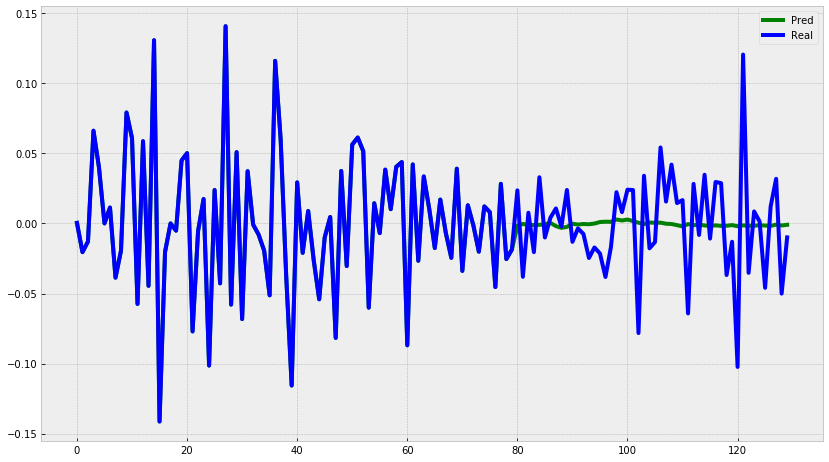

In [24]:
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(airlines_passengers_stat_pred, color='green', linewidth='4', label='Pred')
    plt.plot(airlines_passengers_stat, color='blue', linewidth='4', label='Real')
    plt.legend()

In [ ]:
# Оценить качество (RMSE) и прислать соображения почему была выбрана та или иная модель

Conclusion: 
airlines_passengers_stat - the time series is stationary, the average value is concentrated around 0. Prediction shows this figure

In [26]:
# Let's look 'airlines_passengers' with trend and level
# For predict this time series let's use DEMA
def double_ema_with_preds(series, alpha, beta, n_preds):
    result = [series[0]]
    level, trend = series[0], series[1] - series[0]
    for n in range(1, len(series)):
        value = series[n]
        last_level, level = level, alpha*value + (1-alpha)*(level+trend)
        trend = beta*(level-last_level) + (1-beta)*trend
        result.append(level+trend)
        
    preds = []
    for n in range(n_preds):
        value = result[-1]
        last_level, level = level, alpha*value + (1-alpha)*(level+trend)
        trend = beta*(level-last_level) + (1-beta)*trend
        result.append(level+trend)
        preds.append(level+trend)

    return series.append(pd.Series(preds), ignore_index=True), pd.Series(result)



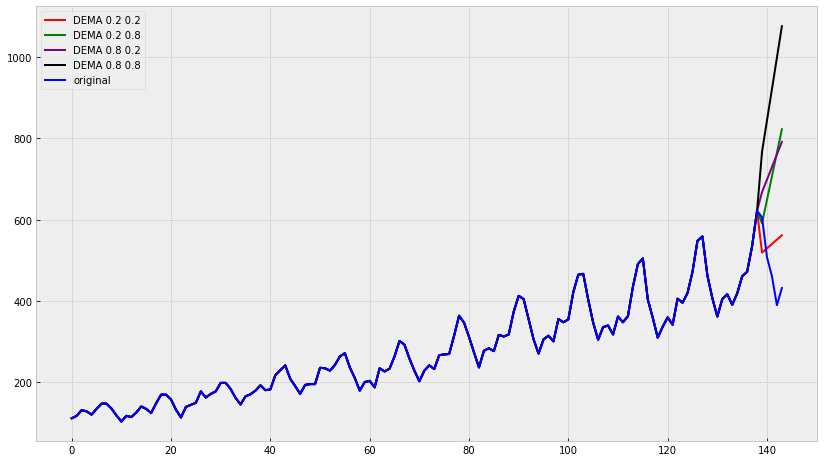

In [36]:

alphas = [0.2,0.2,0.8,0.8]
bettas = [0.2,0.8,0.2,0.8]
colors = ['red', 'green', 'purple', 'black']
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    for i in range(len(alphas)):
        ser, _ = double_ema_with_preds(airlines_passengers[:-5], alphas[i], bettas[i], 5)
        plt.plot(ser, color=colors[i], linewidth='2', label='DEMA {} {}'.format(alphas[i], bettas[i]))
    plt.plot(airlines_passengers[:], color='blue',label='original')
    plt.legend()

In [ ]:
# In DEMA just 1 prediction seems good, but enother predictions give outliers.
# DEMA is not fit for this time series

In [54]:
# Let's try add seasonality with TEMA
def initial_trend(series, season_len):
    return sum([float(series[i + season_len] - series[i]) / season_len]) / season_len


In [55]:
def initial_seasonal_components(series, slen):
    seasonals = {}
    season_averages = []
    n_seasons = int(len(series)/slen)
    # compute season averages
    for j in range(n_seasons):
        season_averages.append(sum(series[slen*j:slen*j+slen])/float(slen))
    # compute initial values
    for i in range(slen):
        sum_of_vals_over_avg = 0.0
        for j in range(n_seasons):
            sum_of_vals_over_avg += series[slen*j+i]-season_averages[j]
        seasonals[i] = sum_of_vals_over_avg/n_seasons
    return seasonals

In [56]:
def triple_exponential_smoothing(series, slen, alpha, beta, gamma, n_preds):
    result = []
    seasonals = initial_seasonal_components(series, slen)
    for i in range(len(series)+n_preds):
        if i == 0: # initial values
            smooth = series[0]
            trend = initial_trend(series, slen)
            result.append(series[0])
            continue
        if i >= len(series): # we are forecasting
            m = i - len(series) + 1
            result.append((smooth + m*trend) + seasonals[i%slen])
        else:
            val = series[i]
            last_smooth, smooth = smooth, alpha*(val-seasonals[i%slen]) + (1-alpha)*(smooth+trend)
            trend = beta * (smooth-last_smooth) + (1-beta)*trend
            seasonals[i%slen] = gamma*(val-smooth) + (1-gamma)*seasonals[i%slen]
            result.append(smooth+trend+seasonals[i%slen])
    return result

In [84]:
def plot_tema(alpha, beta, gamma, ser=airlines_passengers, ser_to_plot=airlines_passengers, n_preds=24):
    tema = triple_exponential_smoothing(ser, 12, alpha, beta, gamma, n_preds)
    with plt.style.context('bmh'):
        plt.figure(figsize=(14, 8))
        plt.plot(ser_to_plot, color='blue',label='original')
        plt.plot(tema, color='red', linewidth='4', label='TEMA')
        plt.title("alpha={}, beta={}, gamma={}".format(alpha, beta, gamma))
        plt.legend()

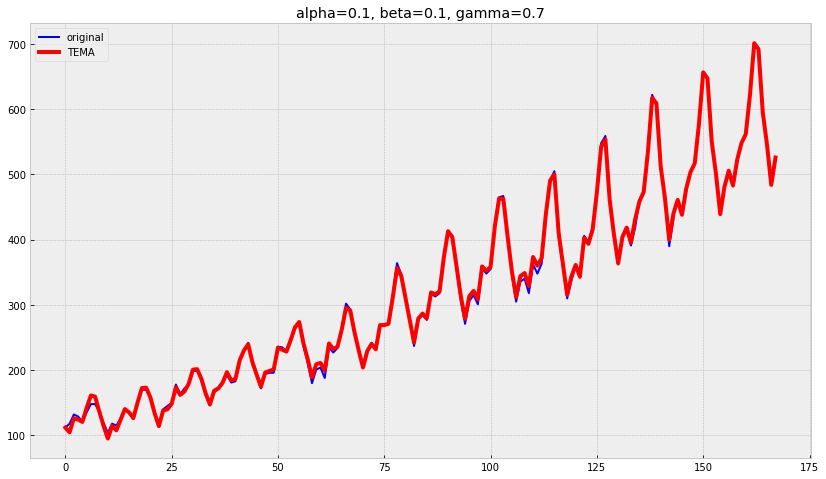

In [94]:
plot_tema(0.1, 0.1, 0.7)

TEMA better, let's optimize hiperparameters


In [95]:
from scipy.optimize import minimize
from sklearn.metrics import mean_squared_error

In [107]:
series = airlines_passengers
train, test, val = series[:100], series[100:120], series[110:]

In [108]:
airlines_passengers.shape

(144,)

In [109]:
def mse(X):
    alpha, beta, gamma = X
    result = triple_exponential_smoothing(train, 12, alpha, beta, gamma, len(test))
    predictions = result[-len(test):]
    error = mean_squared_error(predictions, test)
    return error

In [110]:
opt = minimize(mse, x0=[0.1,0.1,0.7], method="L-BFGS-B", bounds = ((0, 1), (0, 1), (0, 1)))

In [111]:
alpha_opt, beta_opt, gamma_opt = opt.x
print(opt)

      fun: 245.69634899337038
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([-0.20906441,  0.00825082,  0.07513279])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 148
      nit: 20
   status: 0
  success: True
        x: array([0.30460025, 0.37220829, 0.78481158])


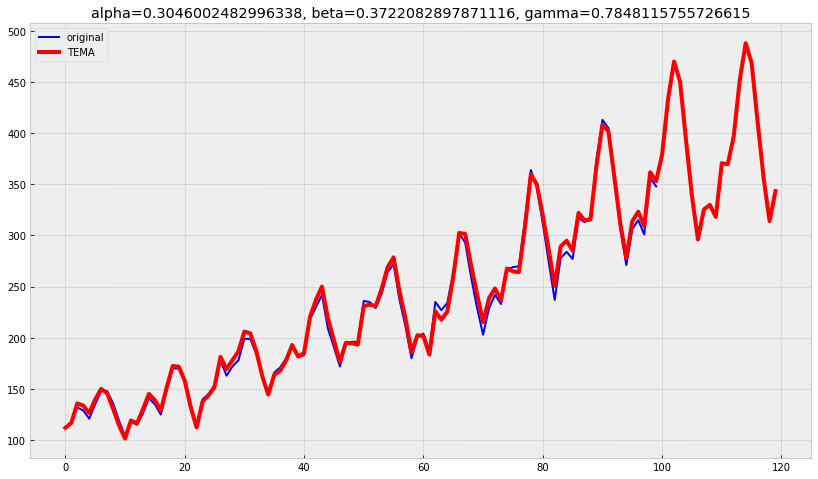

In [114]:
plot_tema(alpha_opt, beta_opt, gamma_opt, ser=train, ser_to_plot=series[:100], n_preds=len(test))

In [129]:
# Оценить качество (RMSE)
predictions = triple_exponential_smoothing(train, 12, alpha_opt, beta_opt, gamma_opt, len(test))
len(predictions[100:])
# len(train)
# len(test)
MSE = mean_squared_error(predictions[100:], test)
print(MSE)

245.69634899337038


 и прислать соображения почему была выбрана та или иная модель
 
 
triple_exponential_smoothing was selected because time series have trend, level and seasonal components